In [51]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

### Water consumption

In [52]:
# Dependencies and Setup
# Water consumption
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
path = Path("Resources/austin_water.csv")

customer_data_df = pd.read_csv(path)
customer_data_df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201201,78613,Irrigation - Multi-Family,11000
1,201201,78613,Multi-Family,23000
2,201201,78617,Residential,19840800
3,201201,78617,Multi-Family,2477000
4,201201,78652,Irrigation - Residential,38500


#### Clean Data

In [53]:
customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')
customer_data_df = customer_data_df[(customer_data_df['Year Month'].dt.year >= 2013) & (customer_data_df['Year Month'].dt.year <= 2017)]
customer_data_df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
1850,2013-01-01,78613,Irrigation - Multi-Family,15000
1851,2013-01-01,78613,Multi-Family,20000
1852,2013-01-01,78617,Irrigation - Residential,200
1853,2013-01-01,78617,Residential,21866800
1854,2013-01-01,78617,Multi-Family,2920900


#### Total water consumption by month

In [54]:
customer_data_df['Year Month'] = pd.to_datetime(customer_data_df['Year Month'], format='%Y%m')

customer_monthly_total= customer_data_df.groupby('Year Month',as_index=False)['Total Gallons'].sum()
customer_monthly_total.head()

,Year Month,Total Gallons
0,2013-01-01,1907330000
1,2013-02-01,1623585500
2,2013-03-01,1746832700
3,2013-04-01,1875674700
4,2013-05-01,2019089400


#### Weather Dataframe

In [55]:

import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
path = Path("Resources/austin_weather.csv")

weather_data_df = pd.read_csv(path)
weather_data_df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Weather group by Average temp

In [56]:
# Group by 'Date' and calculate the sum of 'TempAvgF'
weather_data_df['Date'] = weather_data_df['Date'].str[:-3]
weather_monthly_total= weather_data_df.groupby('Date',as_index=False)['TempAvgF'].mean()
weather_monthly_total.head()


,Date,TempAvgF
0,2013-12,48.818182
1,2014-01,50.870968
2,2014-02,55.178571
3,2014-03,59.064516
4,2014-04,69.400000


### Merge

In [57]:
# Convert 'Date' columns to the same format
customer_monthly_total['Year Month'] = pd.to_datetime(customer_monthly_total['Year Month'], format='%Y-%m-%d')
weather_monthly_total['Date'] = pd.to_datetime(weather_monthly_total['Date'], format='%Y-%m-%d')

# Merge based on matching date values
merged_df = customer_monthly_total.merge(weather_monthly_total, left_on='Year Month', right_on='Date')
merged_df = merged_df[['Date','Total Gallons','TempAvgF']]
merged_df.head(10)

,Date,Total Gallons,TempAvgF
0,2013-12-01,1616286200,48.818182
1,2014-01-01,1761888000,50.870968
2,2014-02-01,1538954800,55.178571
3,2014-03-01,1541012400,59.064516
4,2014-04-01,1779458600,69.400000
5,2014-05-01,1985723400,74.806452
6,2014-06-01,2005111400,82.700000
7,2014-07-01,2134472900,84.580645
8,2014-08-01,2358940000,87.354839
9,2014-09-01,2564459200,80.800000


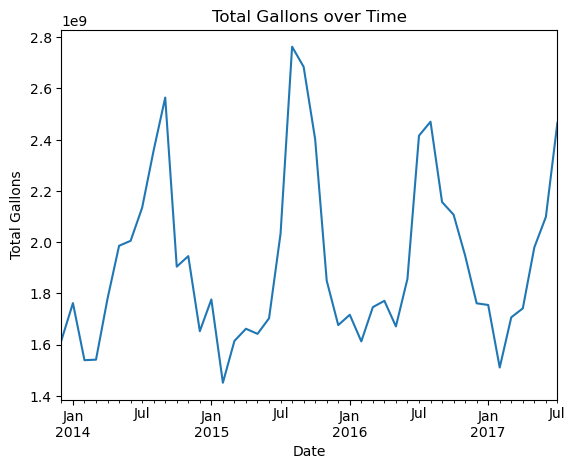

In [58]:

# Set 'Date' column as the index
date_index_df = merged_df.set_index('Date', inplace=False)
# Create the line plot
date_index_df['Total Gallons'].plot(kind='line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Gallons')
plt.title('Total Gallons over Time')

# Display the plot
plt.show()


Correlation coefficient: 0.72
p_value: 0.00000


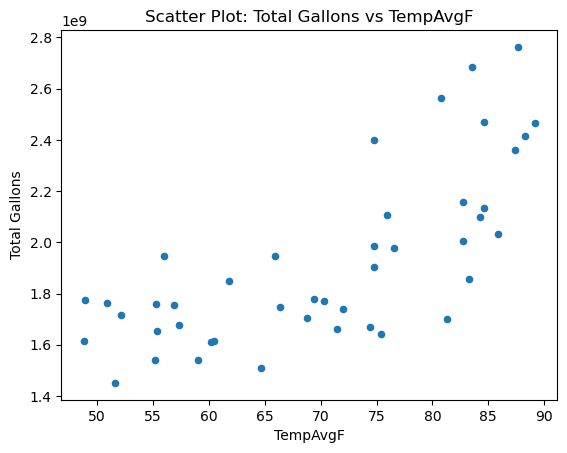

In [59]:
# Create the scatter plot
date_index_df.plot(kind='scatter', x='TempAvgF', y='Total Gallons')

# Add labels and title
plt.xlabel('TempAvgF')
plt.ylabel('Total Gallons')
plt.title('Scatter Plot: Total Gallons vs TempAvgF')
correlation = st.pearsonr(date_index_df['Total Gallons'],date_index_df['TempAvgF'])

# Calculate correlation coefficient
correlation_coefficient = correlation[0]
correlation_text = f'Correlation coefficient: {correlation_coefficient:.2f}'
p_value = correlation[1]
p_value_text=f'p_value: {p_value:.5f}'

print(correlation_text)
print(p_value_text)
# Add correlation text to the plot
#plt.text(merged_df['TempAvgF'].min(), merged_df['Total Gallons'].max(), correlation_text, fontsize=12)

# # Perform linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(merged_df['Total Gallons'], merged_df['TempAvgF'])
# regress_values = merged_df['Total Gallons'] * slope + intercept # (xm + y)

# # generate line plot (color is red and solid)
# plt.plot(merged_df['Total Gallons'],regress_values,"r-")
# Display the plot
plt.show()

It indicates a moderate positive correlation, means there is significant correlation between temp and water volume
Zero p-value suggests strong evidence against the null hypothesis (no correlation) and indicates that the observed correlation is statistically significant.

In [60]:
merged_df.head()
#date_index_df

,Date,Total Gallons,TempAvgF
0,2013-12-01,1616286200,48.818182
1,2014-01-01,1761888000,50.870968
2,2014-02-01,1538954800,55.178571
3,2014-03-01,1541012400,59.064516
4,2014-04-01,1779458600,69.400000


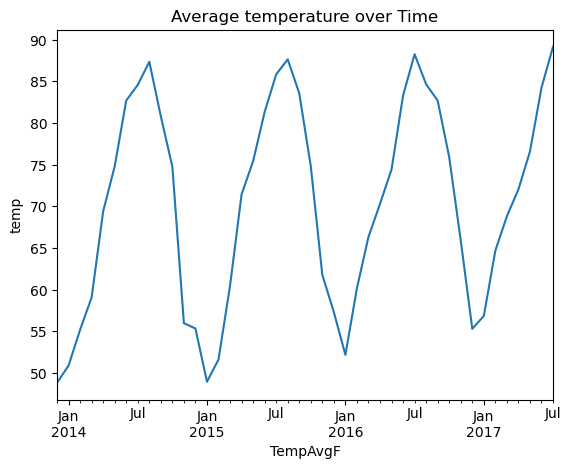

In [61]:


# Create the line plot
date_index_df['TempAvgF'].plot(kind='line')

# Add labels and title
plt.xlabel('TempAvgF')
plt.ylabel('temp')
plt.title('Average temperature over Time')

# Display the plot
plt.show()

In [62]:
# Create a season column based on the month
merged_df['Season'] = merged_df['Date'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                                   else 'Spring' if x in [3, 4, 5]
                                                                   else 'Summer' if x in [6, 7, 8]
                                                                   else 'Fall' if x in [9, 10, 11]
                                                                   else '')

# Group the data by seasons
merged_df.head(10)

,Date,Total Gallons,TempAvgF,Season
0,2013-12-01,1616286200,48.818182,Winter
1,2014-01-01,1761888000,50.870968,Winter
2,2014-02-01,1538954800,55.178571,Winter
3,2014-03-01,1541012400,59.064516,Spring
4,2014-04-01,1779458600,69.400000,Spring
5,2014-05-01,1985723400,74.806452,Spring
6,2014-06-01,2005111400,82.700000,Summer
7,2014-07-01,2134472900,84.580645,Summer
8,2014-08-01,2358940000,87.354839,Summer
9,2014-09-01,2564459200,80.800000,Fall
